In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf 


In [14]:
df = pd.read_excel('../kdt4/workplace2/data/deep_data_files-20220321T014240Z-001/deep_data_files/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [16]:
df.columns = ['cement','furnace','ash','water','superplasticizer','coarse','fine','age','strength']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   furnace           1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse            1030 non-null   float64
 6   fine              1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [18]:
df.head()

,cement,furnace,ash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
y = df.strength #마지막
x = df.loc[:,:'age'] #나머지

In [21]:
y # regression

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=111)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [26]:
x_train.shape

(824, 8)

In [27]:
model = Sequential()
model.add(Dense(256,input_dim=8,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='linear')) #하나의값으로 y값과 비교를해야하기때문 회귀모델엔 activeatio함수없다
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 56)                7224      
                                                                 
 dense_3 (Dense)             (None, 28)                1596      
                                                                 
 dense_4 (Dense)             (None, 1)                 29        
                                                                 
Total params: 44,049
Trainable params: 44,049
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error',optimizer='adam') #로스 , 메트릭스 mse

In [29]:
hist = model.fit(x_train_sc,y_train,epochs=100,batch_size=10,validation_split=0.2) #스케일조절한x와 y값

Epoch 1/100
66/66 [==============================] - 1s 5ms/step - loss: 789.0367 - val_loss: 241.2326
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 172.9001 - val_loss: 151.3852
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 138.5418 - val_loss: 135.8880
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 119.4198 - val_loss: 127.4239
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 112.4366 - val_loss: 136.9898
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 116.9418 - val_loss: 122.1499
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 107.0023 - val_loss: 112.9327
Epoch 8/100
66/66 [==============================] - 0s 3ms/step - loss: 99.4381 - val_loss: 109.3397
Epoch 9/100
66/66 [==============================] - 0s 3ms/step - loss: 98.3905 - val_loss: 97.8886
Epoch 10/100
66/66 [==============================] - 0s 2ms/step - loss: 87

66/66 [==============================] - 0s 3ms/step - loss: 19.4781 - val_loss: 23.1760
Epoch 82/100
66/66 [==============================] - 0s 2ms/step - loss: 19.3832 - val_loss: 27.5698
Epoch 83/100
66/66 [==============================] - 0s 2ms/step - loss: 20.5618 - val_loss: 26.8968
Epoch 84/100
66/66 [==============================] - 0s 2ms/step - loss: 20.5103 - val_loss: 22.7523
Epoch 85/100
66/66 [==============================] - 0s 2ms/step - loss: 19.2711 - val_loss: 23.5747
Epoch 86/100
66/66 [==============================] - 0s 2ms/step - loss: 20.3934 - val_loss: 28.7781
Epoch 87/100
66/66 [==============================] - 0s 2ms/step - loss: 18.9669 - val_loss: 27.0239
Epoch 88/100
66/66 [==============================] - 0s 2ms/step - loss: 19.1694 - val_loss: 23.9149
Epoch 89/100
66/66 [==============================] - 0s 2ms/step - loss: 18.3228 - val_loss: 28.7115
Epoch 90/100
66/66 [==============================] - 0s 2ms/step - loss: 17.8041 - val_loss: 2

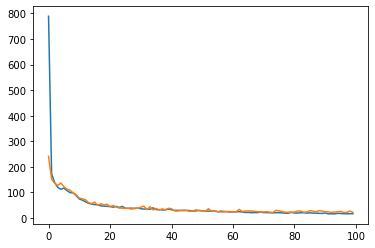

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [31]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 2139650048.0000


2139650048.0

In [32]:
preds = model.predict(x_test_sc)

In [33]:
preds= [v[0] for v in preds]
preds

[47.231766,
 30.31878,
 30.843157,
 32.34404,
 64.1463,
 32.98507,
 18.754072,
 13.818232,
 22.266386,
 17.67904,
 37.341164,
 33.749928,
 36.770996,
 58.70053,
 40.84718,
 57.701225,
 32.753685,
 26.263834,
 31.028341,
 19.347069,
 19.361116,
 29.248148,
 24.397554,
 27.214727,
 41.596306,
 38.635223,
 18.83976,
 17.230856,
 62.617905,
 43.834328,
 63.412373,
 38.083427,
 47.178493,
 34.96206,
 28.431288,
 41.884766,
 33.775627,
 41.01703,
 42.35601,
 28.207022,
 79.68016,
 43.438892,
 26.995152,
 34.17275,
 43.873917,
 29.272448,
 43.0928,
 15.428216,
 32.704468,
 23.054567,
 44.246254,
 58.07651,
 32.147797,
 33.615547,
 42.330097,
 47.73429,
 50.249134,
 41.194153,
 34.837364,
 29.464075,
 35.46981,
 11.333612,
 51.03076,
 28.999044,
 83.25701,
 22.498598,
 17.201221,
 51.388115,
 57.135162,
 82.95498,
 42.183132,
 47.206825,
 41.028824,
 39.185593,
 46.410065,
 25.015915,
 10.730829,
 69.23666,
 57.656406,
 55.155655,
 54.478542,
 38.861633,
 33.481106,
 43.4946,
 40.725937,
 77.2

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,preds) # 실제값ㅂ과 모델예측값 

0.8748072314666503

In [35]:
for i in zip(y_test,preds):
    print(i)

(47.739318239999996, 47.231766)
(30.44726016, 30.31878)
(42.29245784, 30.843157)
(32.922478999999996, 32.34404)
(65.909079268, 64.1463)
(26.22766704, 32.98507)
(20.96696516, 18.754072)
(10.53519328, 13.818232)
(23.221551679999997, 22.266386)
(13.395533715270679, 17.67904)
(33.05347944, 37.341164)
(42.79577532, 33.749928)
(36.44570136, 36.770996)
(52.82075636, 58.70053)
(37.34202016, 40.84718)
(62.935369279999996, 57.701225)
(33.72916592, 32.753685)
(29.7508894, 26.263834)
(24.40055564, 31.028341)
(24.44881896, 19.347069)
(20.08443588, 19.361116)
(32.039949719999996, 29.248148)
(18.287661424, 24.397554)
(34.23937816, 27.214727)
(49.20100736, 41.596306)
(50.60064364, 38.635223)
(21.917063088, 18.83976)
(15.091250688, 17.230856)
(64.30053176, 62.617905)
(41.934619796, 43.834328)
(68.29949256, 63.412373)
(39.056057496, 38.083427)
(44.38846488, 47.178493)
(33.398217439999996, 34.96206)
(30.2335226, 28.431288)
(34.73580088, 41.884766)
(33.5430074, 33.775627)
(39.45181672, 41.01703)
(48.84661